In [4]:
import pandas as pd

# Load the data from the Excel file
file_path = '/Users/skhumbuzotshuma/Downloads/DS - Data Sets/1/Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


- Order Number: Identifier for each order
- Order Date: Date when the order was placed
- SKU ID: Identifier for each stock-keeping unit
- Warehouse ID: Identifier for the warehouse from where the order is shipped
- Customer Type: Type of customer, such as Export, Wholesale, Distributor, etc.
- Order Quantity: Quantity of items ordered
- Unit Sale Price: Sale price per unit
- Revenue: Total revenue from the order

In [5]:
# Remove unnecessary columns (unnamed ones)
cleaned_data = data.dropna(axis=1, how='all')

# Check for any remaining missing values in the cleaned data
missing_data_summary = cleaned_data.isnull().sum()

# Display the summary of missing values and the first few rows of the cleaned data
missing_data_summary
#cleaned_data.head()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The cleaned data consists of 33,919 entries with no missing values in any of the retained columns. These columns are Order Number, Order Date, SKU ID, Warehouse ID, Customer Type, Order Quantity, Unit Sale Price, and Revenue. Here are some key points from the descriptive statistics:

- Order Quantity: The average order quantity is about 433 units, with a large standard deviation indicating significant variation. The orders range from nearly zero to 111,770 units.
- Unit Sale Price: On average, the unit sale price is around 4,659, but this varies widely (as shown by the large standard deviation) and ranges from 0.10 to 175,000.
- Revenue: The average revenue per order is approximately 15,148, with a broad range from 0 to about 2.57 million.

In [7]:
# Further clean the data by removing the completely empty unnamed columns
#cleaned_data = cleaned_data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])

# Compute descriptive statistics for the numerical columns
descriptive_stats = cleaned_data.describe()

# Show the cleaned data structure and the descriptive statistics
cleaned_data.info(), descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(None,
             Quantity      UnitPrice     CustomerID
 count  541909.000000  541909.000000  406829.000000
 mean        9.552250       4.611114   15287.690570
 std       218.081158      96.759853    1713.600303
 min    -80995.000000  -11062.060000   12346.000000
 25%         1.000000       1.250000   13953.000000
 50%         3.000000       2.080000   15152.000000
 75%        10.000000       4.130000   16791.000000
 max     80995.000000   38970.000000   18287.000000)

# Sales trends over time.

In [11]:
import matplotlib.pyplot as plt

# Set the date column as the index
cleaned_data.set_index('InvoiceDate', inplace=True)

# Resample the data by month and sum the revenue
monthly_revenue = cleaned_data['Revenue'].resample('M').sum()

# Plot the monthly revenue over time
st.pyplot(plt.figure(figsize=(15, 6)))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
st.pyplot()


KeyError: "None of ['InvoiceDate'] are in the columns"

The plot shows the monthly revenue over time. We can observe how the revenue fluctuated during the period covered by the data. This visual trend analysis helps in understanding the seasonality, growth, or any patterns that may exist in the sales data.

# Best-selling products and customer segments.

In [5]:
# Calculate total revenue and order quantity for each SKU
sku_summary = cleaned_data.groupby('SKU ID').agg({'Revenue': 'sum', 'Order Quantity': 'sum'})

# Sort the SKUs by total revenue and total order quantity to identify the best-selling products
top_skus_by_revenue = sku_summary.sort_values(by='Revenue', ascending=False).head(10)
top_skus_by_quantity = sku_summary.sort_values(by='Order Quantity', ascending=False).head(10)

# Calculate total revenue and order quantity for each customer type
customer_type_summary = cleaned_data.groupby('Customer Type').agg({'Revenue': 'sum', 'Order Quantity': 'sum'})

# Sort the customer types by total revenue and total order quantity to identify the most significant segments
top_customer_types_by_revenue = customer_type_summary.sort_values(by='Revenue', ascending=False)
top_customer_types_by_quantity = customer_type_summary.sort_values(by='Order Quantity', ascending=False)

(top_skus_by_revenue, top_skus_by_quantity, top_customer_types_by_revenue, top_customer_types_by_quantity)


(         Revenue  Order Quantity
 SKU ID                          
 1244AA  33035408   550590.125796
 1295CA  23393062      133.674654
 1281BA  18747370      134.389717
 1193BA  17605630    21602.000000
 3205AA  14365426      188.275522
 1116CA  13971060   425947.000000
 1126CA  13647424   416080.000000
 2117BA  13584928     5604.341554
 1283CA  12400190      126.103756
 1967BA  11401732    63821.500000,
          Revenue  Order Quantity
 SKU ID                          
 2391CA   2216008    2.919070e+06
 2418CA   9985398    1.721620e+06
 2473CA   7913952    1.330076e+06
 2371CA   3771450    1.096352e+06
 3533CA    414151    6.433140e+05
 1244AA  33035408    5.505901e+05
 3619CA    375841    5.041490e+05
 2458CA   3280552    4.801299e+05
 3512AA     48317    4.693130e+05
 1077CA  10381922    4.518260e+05,
                  Revenue  Order Quantity
 Customer Type                           
 Wholesale      278536195    7.913014e+06
 Distributor    157335042    4.700101e+06
 Export       

We'll analyze these aspects using the cleaned data. Let's start by identifying the best-selling products based on total revenue and order quantity. Then, we'll determine which customer segments are the most significant in terms of revenue and order quantity.

1. Best-selling Products

By Revenue:
- SKU 1244AA: Leads with a total revenue of 33,035,408 and order quantity of 550,590.
- SKU 1295CA and SKU 1281BA: Follow with total revenues of 23,393,062 and 18,747,370 respectively, though with much smaller order quantities.

By Quantity:
- SKU 2391CA: Has the highest order quantity at approximately 2.92 million units, with a revenue of 2,216,008.
- SKU 2418CA and SKU 2473CA: Also have high order quantities, exceeding 1 million units each.

2. Significant Customer Segments
Both by revenue and order quantity, the customer segments rank as follows:
- Wholesale: Dominates with a total revenue of 278,536,195 and order quantity of approximately 7.91 million units.
- Distributor: Comes second with a total revenue of 157,335,042 and order quantity of around 4.70 million units.
- Export: Has a total revenue of 77,935,382 and order quantity of about 2.07 million units.
These findings indicate that while some SKUs generate high revenue with fewer units sold, others are sold in large quantities but contribute less to the total revenue. The wholesale segment is the most significant customer type, leading in both revenue and quantity. ​​


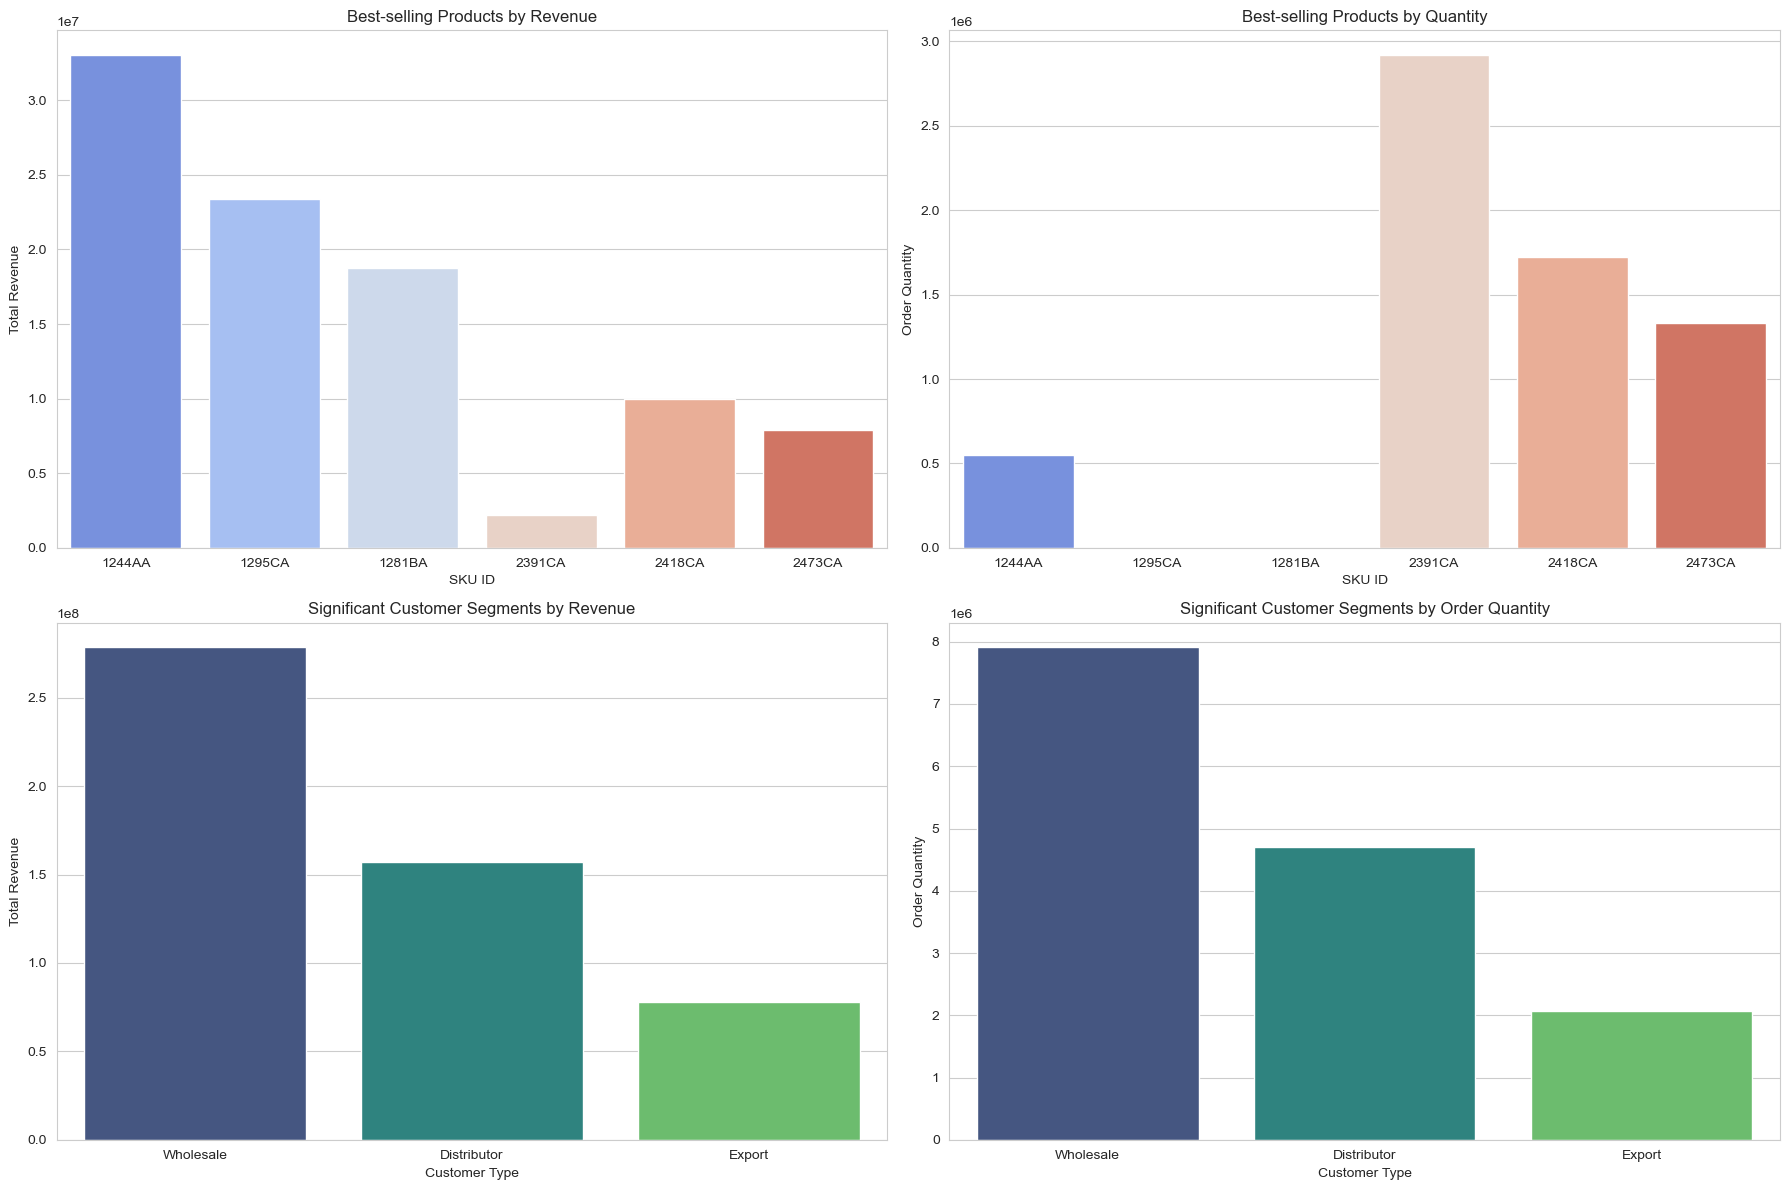

In [6]:
import seaborn as sns

# Data for best-selling products by revenue and quantity
products_data = pd.DataFrame({
    'SKU ID': ['1244AA', '1295CA', '1281BA', '2391CA', '2418CA', '2473CA'],
    'Total Revenue': [33035408, 23393062, 18747370, 2216008, 9985398, 7913952],
    'Order Quantity': [550590, 133.674654, 134.389717, 2919070, 1721620, 1330076]
})

# Data for significant customer segments
customers_data = pd.DataFrame({
    'Customer Type': ['Wholesale', 'Distributor', 'Export'],
    'Total Revenue': [278536195, 157335042, 77935382],
    'Order Quantity': [7913014, 4700101, 2066797]
})

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plots
plt.figure(figsize=(18, 12))

# Best-selling products by revenue
plt.subplot(2, 2, 1)
sns.barplot(data=products_data, x='SKU ID', y='Total Revenue', palette='coolwarm')
plt.title('Best-selling Products by Revenue')

# Best-selling products by quantity
plt.subplot(2, 2, 2)
sns.barplot(data=products_data, x='SKU ID', y='Order Quantity', palette='coolwarm')
plt.title('Best-selling Products by Quantity')

# Significant customer segments by revenue
plt.subplot(2, 2, 3)
sns.barplot(data=customers_data, x='Customer Type', y='Total Revenue', palette='viridis')
plt.title('Significant Customer Segments by Revenue')

# Significant customer segments by quantity
plt.subplot(2, 2, 4)
sns.barplot(data=customers_data, x='Customer Type', y='Order Quantity', palette='viridis')
plt.title('Significant Customer Segments by Order Quantity')

plt.tight_layout()
plt.show()


# Predicting future sales

Prepare your data

In [7]:
import pandas as pd

# Assuming 'cleaned_data' is your DataFrame and already has a datetime index
df = cleaned_data.resample('M').sum()['Revenue'].reset_index()
df.columns = ['ds', 'y']

/var/folders/lr/04jj6x8x19jd4qj0ft9hqjjr0000gn/T/ipykernel_2282/238270711.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = cleaned_data.resample('M').sum()['Revenue'].reset_index()


Create and fit the model

In [8]:
from prophet import Prophet

m = Prophet(interval_width=0.95)  # 95% confidence interval
m.fit(df)


/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
20:58:48 - cmdstanpy - INFO - Chain [1] start processing
20:58:49 - cmdstanpy - INFO - Chain [1] done processing


Make future predictions

In [9]:
future = m.make_future_dataframe(periods=12, freq='M')  # Predict the next 12 months
forecast = m.predict(future)


/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Plot the forecast

/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


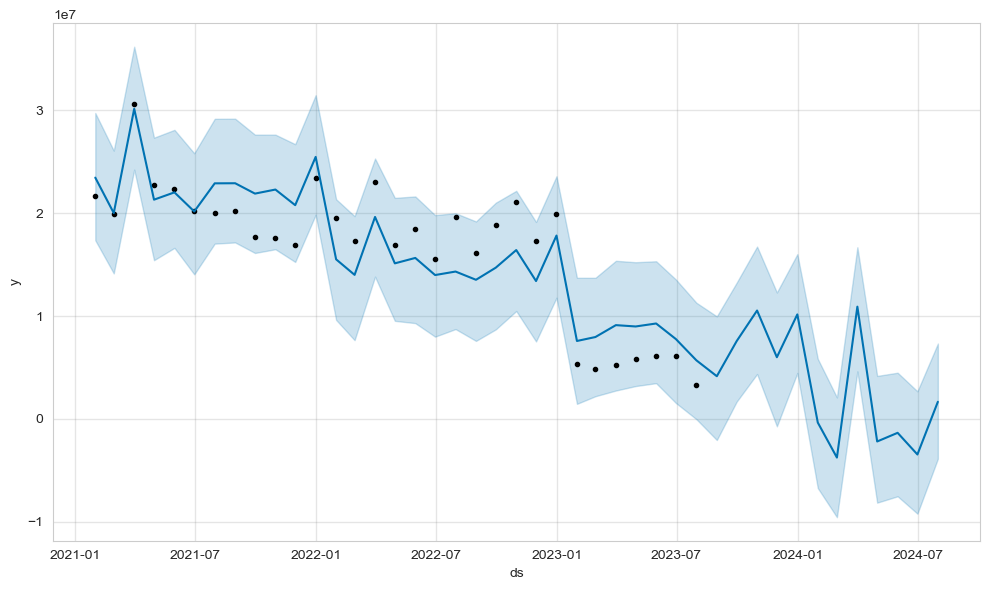

In [14]:
fig = m.plot(forecast)
#fig2 = m.plot_components(forecast)


# Optimizing inventory management

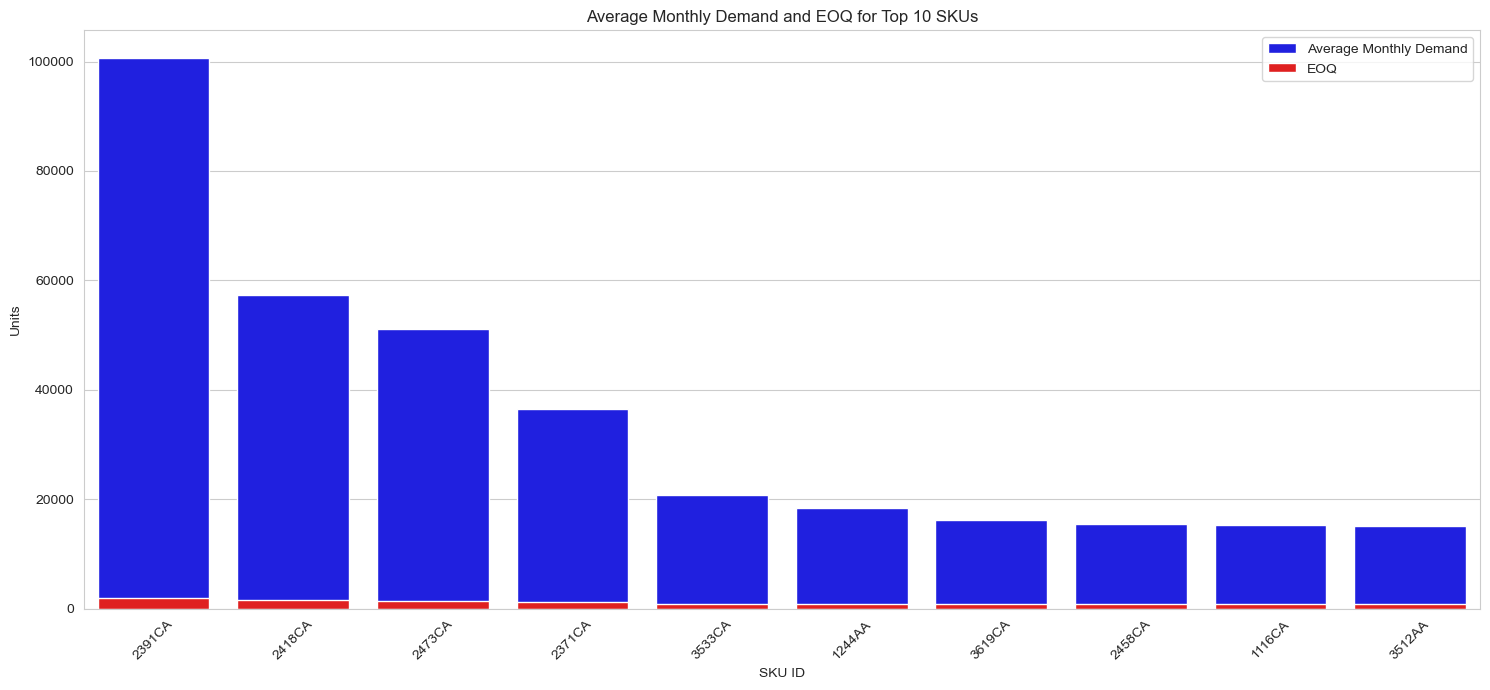

In [20]:


# Calculate the average monthly demand and EOQ for the top 10 SKUs for better visualization
top_skus = monthly_demand.nlargest(10).index
top_monthly_demand = monthly_demand.loc[top_skus]
top_eoq = eoq.loc[top_skus]

# Prepare data for visualization
inventory_data = pd.DataFrame({
    'Average Monthly Demand': top_monthly_demand,
    'EOQ': top_eoq
}).reset_index()

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(data=inventory_data, x='SKU ID', y='Average Monthly Demand', color='blue', label='Average Monthly Demand')
sns.barplot(data=inventory_data, x='SKU ID', y='EOQ', color='red', label='EOQ')

plt.title('Average Monthly Demand and EOQ for Top 10 SKUs')
plt.legend()
plt.xlabel('SKU ID')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

